In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from pathlib import Path
#import tensorflow as tf

# Import our input dataset
#data = Path('./Data/FIMA_cleaned.csv')
data = Path('./Data/FEMA_datesplit.csv')
FEMA_df = pd.read_csv(data)
FEMA_df.head()

C:\Users\patel\Anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,reportedcity,dateofloss,elevationdifference,floodzone,latitude,longitude,numberoffloorsintheinsuredbuilding,occupancytype,originalconstructiondate,amountpaidonbuildingclaim,state,reportedzipcode,lossyear,lossmonth,lossday,builtyear,builtmonth,builtlossday,propertyage
0,OCEANSIDE,1998-02-07,999.0,X,33.2,-117.3,4.0,1.0,1963-01-01,0.00,CA,92056,1998.0,2.0,7.0,1963.0,1.0,1.0,35.0
1,NEW ORLEANS,2005-08-29,999.0,X,29.9,-90.0,2.0,1.0,1967-07-01,0.00,LA,70131,2005.0,8.0,29.0,1967.0,7.0,1.0,38.0
2,NAVARRE,1998-09-28,999.0,X,30.4,-86.9,1.0,1.0,1972-01-01,8813.21,FL,32566,1998.0,9.0,28.0,1972.0,1.0,1.0,26.0
3,BEAUFORT,1994-10-07,999.0,X,32.4,-80.7,2.0,1.0,1960-01-01,2906.00,SC,29902,1994.0,10.0,7.0,1960.0,1.0,1.0,34.0
4,MELBOURNE,1996-03-11,999.0,X,28.3,-80.7,1.0,1.0,1988-01-01,3875.53,FL,32940,1996.0,3.0,11.0,1988.0,1.0,1.0,8.0


In [2]:
FEMA_2019 = FEMA_df.copy()

indexNames = FEMA_2019[FEMA_2019['lossyear'] < 2019 ].index
 
# Delete these row indexes from dataFrame
FEMA_2019.drop(indexNames , inplace=True)


# 2019 has:
##Total entries: 18381
##Not paid: 5211
##Paid: 13170

In [72]:
df = FEMA_2019.copy()

#Features: Floodzone, 

#df = df.drop("reportedzipcode", axis=1)
df = df.drop("dateofloss", axis=1)
df = df.drop("originalconstructiondate", axis=1)
df = df.drop("reportedcity", axis=1)
df = df.drop("elevationdifference", axis=1)
df = df.drop("latitude", axis=1)
df = df.drop("longitude", axis=1)
df = df.drop("lossyear", axis=1)
df = df.drop("lossday", axis=1)
df = df.drop("builtlossday", axis=1)
df = df.drop("builtmonth", axis=1)
df = df.drop("builtyear", axis=1)
df = df.drop("numberoffloorsintheinsuredbuilding", axis=1)
#df = df.drop("occupancytype", axis=1)
#df = df.drop("amountpaidonbuildingclaim", axis=1)
FEMA_encoded = pd.get_dummies(df, columns=["state", "floodzone", "lossmonth", "occupancytype"])#, "recievedpayment"])

y =FEMA_encoded.copy()
X = FEMA_encoded.copy()
X = X.drop("amountpaidonbuildingclaim", axis=1)

In [73]:
df

,floodzone,occupancytype,amountpaidonbuildingclaim,state,reportedzipcode,lossmonth,propertyage
1131,X,1.0,48445.08,VA,22101,7.0,59.0
1283,X,1.0,0.00,TX,76021,5.0,36.0
1534,X,1.0,0.00,GA,30327,8.0,54.0
1590,X,1.0,182199.09,AR,72903,5.0,42.0
2033,X,1.0,0.00,SC,29210,1.0,49.0
...,...,...,...,...,...,...,...
1986011,AE,1.0,93848.99,OK,74074,5.0,54.0
1986199,AE,1.0,4212.50,GA,30340,4.0,60.0
1986203,AE,1.0,6709.34,GA,30083,6.0,49.0
1986207,X,1.0,637.93,GA,31326,6.0,22.0


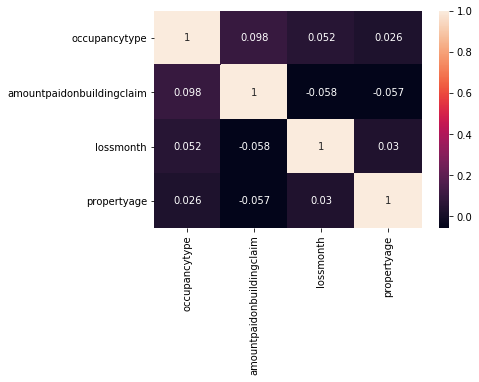

In [74]:
#generating a correlation matrix
corrMatrix = df.corr()

import seaborn as sn
sn.heatmap(corrMatrix, annot=True)

In [75]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y['amountpaidonbuildingclaim'],
                                                   random_state=1)

In [76]:
# Train the Classifier

from sklearn.linear_model import LinearRegression

#random forest, neural networks with linear regression
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
model.score(X_test, y_test)

0.10552911108403883

In [78]:
X_train

,reportedzipcode,propertyage,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,...,lossmonth_4.0,lossmonth_5.0,lossmonth_6.0,lossmonth_7.0,lossmonth_8.0,occupancytype_1.0,occupancytype_2.0,occupancytype_3.0,occupancytype_4.0,occupancytype_6.0
322691,78552,20.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
156983,71111,11.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
625664,68064,99.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1099837,78596,25.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1883206,70380,33.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981258,63123,55.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1937599,77365,35.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
310063,77099,50.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1061334,78550,51.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [79]:
X_test

,reportedzipcode,propertyage,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,...,lossmonth_4.0,lossmonth_5.0,lossmonth_6.0,lossmonth_7.0,lossmonth_8.0,occupancytype_1.0,occupancytype_2.0,occupancytype_3.0,occupancytype_4.0,occupancytype_6.0
1027694,78552,21.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1885398,54301,47.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
76171,95421,42.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1967725,70715,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
257678,70125,79.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839499,77471,42.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1089889,72342,36.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
178363,74354,48.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
162944,52802,61.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
